# SVM

## Encode

In [3]:
from Bio import SeqIO
import numpy as np

In [4]:
import pandas as pd

# Load the File Path
pos_file_path = "C:/Users/ddes2/Desktop/桌面/BML/Assignment_2/CD_HIT_Pos.fasta"
neg_file_path = "C:/Users/ddes2/Desktop/桌面/BML/Assignment_2/CD_HIT_Neg.fasta"

# Load Sequences from the File
def load_seq(file_path):
  with open(file_path, 'r') as file:
    return[str(record.seq) for record in SeqIO.parse(file, "fasta")]

# Load Positive and Negative sequence
pos_seq = load_seq(pos_file_path)
neg_seq = load_seq(neg_file_path)

# The number of Sequences of Pos and Neg
len_pos_seq = len(pos_seq)
len_neg_seq = len(neg_seq)

len_pos_seq, len_neg_seq

(4960, 37625)

In [35]:
# # One-hot encoding for amino acid sequences
# import numpy as np

# # Amino acids (standard 20 amino acids)
# amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# # Create a mapping for amino acids to integers
# aa_to_int = {aa: i for i, aa in enumerate(amino_acids)}

# # Function to one-hot encode a sequence
# def one_hot_encode(seq):
#     # Create a zero-filled matrix of shape (len(seq), 20)
#     one_hot = np.zeros((len(seq), len(amino_acids)), dtype=np.int8)
#     for i, aa in enumerate(seq):
#         if aa in aa_to_int:
#             one_hot[i, aa_to_int[aa]] = 1
#     return one_hot

# # Redefine the one-hot encoding function to handle a batch of sequences
# def one_hot_encode_batch(sequences, batch_size=1000):
#     encoded_batches = []
#     for i in range(0, len(sequences), batch_size):
#         batch = sequences[i:i+batch_size]
#         encoded_batch = [one_hot_encode(seq) for seq in batch]
#         encoded_batches.extend(encoded_batch)
#     return encoded_batches

# # Perform one-hot encoding in batches for negative sequences
# # Due to potential memory constraints, we'll encode a smaller batch as a test
# neg_encoded = one_hot_encode_batch(neg_seq)
# pos_encoded = one_hot_encode_batch(pos_seq)

# # Check the shape of the first few encoded sequences
# neg_encoded_test_batch_shapes = [encoded_seq.shape for encoded_seq in neg_encoded[:5]]
# pos_encoded_test_batch_shapes = [encoded_seq.shape for encoded_seq in pos_encoded[:5]]

# neg_encoded_test_batch_shapes, pos_encoded_test_batch_shapes



([(31, 20), (31, 20), (31, 20), (31, 20), (31, 20)],
 [(31, 20), (31, 20), (31, 20), (31, 20), (31, 20)])

In [5]:
import pandas as pd

# Function to flatten the one-hot encoded sequence and convert to DataFrame
def flatten_and_convert_to_df(encoded_sequences):
    flattened_sequences = [encoded_seq.flatten() for encoded_seq in encoded_sequences]
    return pd.DataFrame(flattened_sequences)

# Flatten the encoded test batch and convert to DataFrame
neg_encoded_df = flatten_and_convert_to_df(neg_encoded)
pos_encoded_df = flatten_and_convert_to_df(pos_encoded)

# Save the DataFrame to a CSV file
neg_csv_path = 'C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/onehot_neg.csv'
neg_encoded_df.to_csv(neg_csv_path, index=False)

# Save the DataFrame to a CSV file
pos_csv_path = 'C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/onehot_pos.csv'
pos_encoded_df.to_csv(pos_csv_path, index=False)

neg_csv_path, pos_csv_path


KeyError: ''

## Load Data

In [37]:
import pandas as pd

# Load Dataset
AAC_pos = pd.read_csv('C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/onehot_pos.csv')
AAC_neg = pd.read_csv('C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/onehot_neg.csv')

# Confirm the number of Positive Negative Dataset Negative Dataset
num_pos = len(AAC_pos)
num_neg = len(AAC_neg)

num_pos, num_neg


(4960, 37625)

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\clust

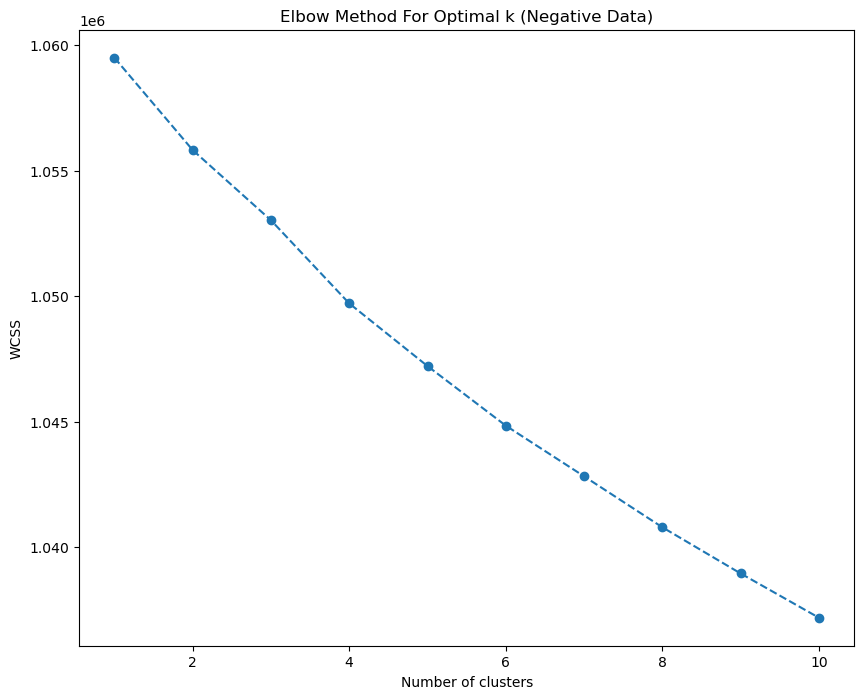

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop the unnecessary part
# negative_data_numeric = AAC_neg.drop(columns=['#'])

# Function to calculate the sum of squared distances for different number of clusters
def calculate_wcss(data):
    wcss = []
    for i in range(1, 11):
        kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(AAC_neg)
        wcss.append(kmeans.inertia_)
    return wcss

# Prepare data for KMeans (drop the 'name' column as it's not needed for clustering)
# X_neg = AAC_neg.drop('#', axis=1)

# Calculate WCSS for different number of clusters
wcss_neg = calculate_wcss(AAC_neg)

# Plot the elbow graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss_neg, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k (Negative Data)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [41]:
wcss_neg_cleaned = calculate_wcss(wcss_neg)
wcss_neg_cleaned

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\clust

[1059507.9607176082,
 1055828.9957329116,
 1053031.6213191838,
 1049717.7541951127,
 1047219.7714820763,
 1044845.9415899243,
 1042826.8645595016,
 1040795.884752664,
 1038955.4110965224,
 1037191.9391833006]

In [42]:
# Inspect the first few rows of the negative data to identify non-numeric columns
AAC_neg.head()


,0,1,2,3,4,5,6,7,8,9,...,610,611,612,613,614,615,616,617,618,619
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Re-prepare the data for clustering
n_clusters=5
samples_per_cluster = len(AAC_pos) // n_clusters

# Perform KMeans clustering on the cleaned negative data with 3 clusters
kmeans = KMeans(n_clusters, random_state=42)
negative_data_clusters = kmeans.fit_predict(AAC_neg)

# Add the cluster information to the negative data
X_neg = AAC_neg.copy()
X_neg['Cluster'] = negative_data_clusters

# Sample data from each cluster to match the number of positive samples
balanced_neg_data = pd.DataFrame()
for cluster in range(n_clusters):
    cluster_sample_count = len(X_neg[X_neg['Cluster'] == cluster])
    num_samples = min(samples_per_cluster, cluster_sample_count)
    sampled_data = X_neg[X_neg['Cluster'] == cluster].sample(n=num_samples, random_state=42)
    balanced_neg_data = pd.concat([balanced_neg_data, sampled_data], ignore_index=True)

# Check the total number of selected negative samples
total_selected_neg_samples = len(balanced_neg_data)
total_selected_neg_samples


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4960

拆分數據集

In [49]:
combined_data = pd.concat([AAC_pos, balanced_neg_data], ignore_index=True)
combined_data['Label'] = [1 if i < len(AAC_pos) else 0 for i in range(len(combined_data))]

In [50]:
len(combined_data)

9920

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = combined_data.drop(columns=['Cluster', 'Label'])
y = combined_data['Label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## Model Building

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Instantiate the SVM model
svm_model = SVC(probability=True)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=10)

# Calculate average score from cross-validation
avg_cv_score = cv_scores.mean()

# Print the average score
print("Average 10-Fold CV Score: {:.2f}".format(avg_cv_score))

# You can also fit the model on the entire training set if you need to make predictions later
# svm_model.fit(X_train, y_train)


Average 10-Fold CV Score: 0.69


In [57]:
svm_model.fit(X_train, y_train)
# 在驗證集和測試集上評估模型效果

y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for testing set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')



Validation -
Sensitivity: 0.6841046277665996
Specificity: 0.6727272727272727
Accuracy: 0.6784274193548387
MCC: 0.35685728603799394
F1 Score: 0.6806806806806808
Test -
Sensitivity: 0.6829745596868885
Specificity: 0.6860706860706861
Accuracy: 0.6844758064516129
MCC: 0.3688884432256442
F1 Score: 0.6904055390702274


Val -
fpr_val: [0.         0.32727273 1.        ]
tpr_val: [0.         0.68410463 1.        ]
AUC_val: 0.6784159502469361
Test -
fpr_test: [0.         0.31392931 1.        ]
tpr_test: [0.         0.68297456 1.        ]
AUC_test: 0.6845226228787872


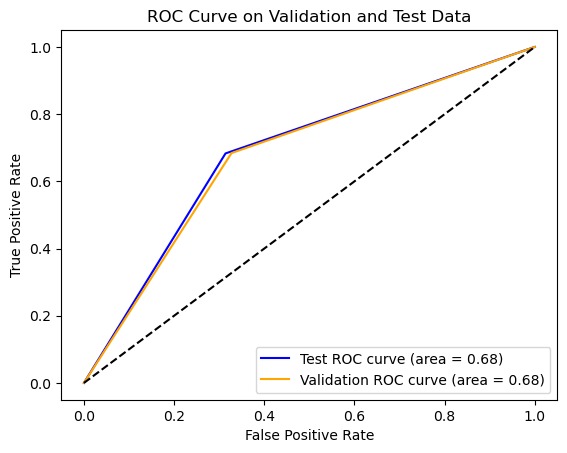

In [59]:
# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'''Val -
fpr_val: {fpr_val}
tpr_val: {tpr_val}
AUC_val: {roc_auc_val}''')

print(f'''Test -
fpr_test: {fpr_test}
tpr_test: {tpr_test}
AUC_test: {roc_auc_test}''')



plt.figure()

# Plot the ROC curve of testing
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, color='blue')
plt.plot(fpr_val, tpr_val, label='Validation ROC curve (area = %0.2f)' % roc_auc_val, color='orange')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation and Test Data')
plt.legend(loc="lower right")
plt.show()
